# Video Game Sales

`vgsales.csv` 파일을 읽어 데이터프레임 객체로 변환한 후 아래 문제들을 해결해보시오.

---
### Ref.
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/

---

In [2]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


문제 1. 데이터 구조 파악
- 데이터의 행 수, 열 수를 출력하시오.
- 결측치가 있는 컬럼을 찾아 개수를 함께 출력하시오.

In [3]:
print(f'데이터의 행수,열수 : {df.shape}')

print(f'데이터의 행 인덱스 정보 : {df.index} / {len(df.index)}')
print(f'데이터의 열 컬럼 정보 : {df.columns} / {len(df.columns)}')

print('* 컬럼 별 결측치 개수 *')
print(df.isnull().sum())

데이터의 행수,열수 : (16598, 11)
데이터의 행 인덱스 정보 : RangeIndex(start=0, stop=16598, step=1) / 16598
데이터의 열 컬럼 정보 : Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object') / 11
* 컬럼 별 결측치 개수 *
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


문제 2. 연도 (Year) 컬럼 정리
- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도를 각각 구하시오.
- 출시 연도가 없는 데이터를 제거한 새로운 데이터 프레임을 만드시오.

In [4]:
year_column = df['Year']
print(f'Year 컬럼의 최소값: {year_column.min()}')
print(f'Year 컬럼의 최대값: {year_column.max()}')
# 가장 많이 등장하는 연도 -> 최빈값 (mode())
print(f'Year 컬럼의 최빈값: {year_column.mode()[0]}')


# 출시 연도가 없는 데이터 제거
# -> Year 컬럼의 결측치 제거
df = df.dropna(subset=['Year'])
# df['Year'].dropna()
print(f'출시 연도(Year) 결측치 : {df["Year"].isnull().sum()}')


Year 컬럼의 최소값: 1980.0
Year 컬럼의 최대값: 2020.0
Year 컬럼의 최빈값: 2009.0
출시 연도(Year) 결측치 : 0


문제 3. 주요 컬럼의 고유값 탐색
- Platform, Genre, Publisher 각각 어떤 값들이 있는 지 고유값 목록을 출력하시오.
- Genre는 총 몇 종류인지 구하시오.

In [5]:
print('* --- Platform 고유값 목록 --- *')
# print(df['Platform'].value_counts().index)
# * uique() : 고유값 목록을 배열 형태로 반환
print(df['Platform'].unique())

print('* --- Genre 고유값 목록 --- *')
print(df['Genre'].unique())

print('* --- Publisher 고유값 목록 --- *')
print(df['Publisher'].unique())


print(f' Genre 는 {df["Genre"].nunique()} 종류 입니다.')
# * nunique() : 고유값 개수

* --- Platform 고유값 목록 --- *
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
* --- Genre 고유값 목록 --- *
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
* --- Publisher 고유값 목록 --- *
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interacti

문제 4. 연도별 게임 출시 수
- 연도별 게임 출시 갯수를 구하고, 연도 오름차순으로 정렬하시오.
- 위 데이터를 선 그래프로 시각화하시오.

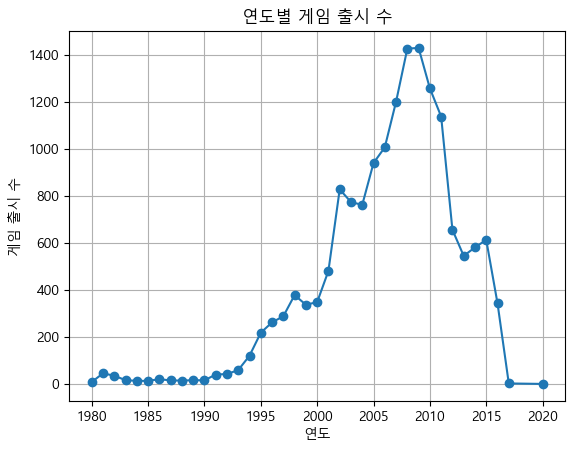

In [6]:
# sort_index() : 행 인덱스 기준으로 정렬(오름차순). 데이터 프레임인 경우 axis=1 열 인덱스 기준으로 정렬 가능.
size_by_year = df.groupby('Year').size().sort_index()
size_by_year
# 선 그래프
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') # 한글 설정

plt.figure()
# size_by_year.plot(kind='line', marker='o')
plt.plot(size_by_year.index, size_by_year.values, linestyle='-', marker='o')
plt.title('연도별 게임 출시 수')
plt.xlabel('연도')
plt.ylabel('게임 출시 수')
plt.grid(True)
plt.show()

문제 5. 플랫폼별 전 세계 판매량
- 플랫폼(Platform) 별로 Global_Sales를 합산하고, 판매량이 높은 순으로 TOP 10을 막대그래프로 시각화하시오.

<BarContainer object of 10 artists>

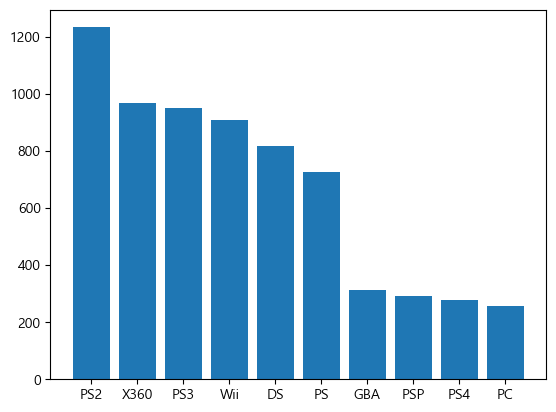

In [7]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
top10 = sales_by_platform.head(10)
# print(top10)

plt.figure()
# top10.plot(kind='bar')
plt.bar(x=top10.index, height=top10)

문제 6. 가장 많이 판매된 장르
- 장르별 Global_Sales 총합을 구해 가장 높은 장르를 찾으시오.
- 장르별 판매 비중을 파이차트로 시각화하시오.

Text(0.5, 1.0, '장르 별 글로벌 판매 비중 (Top6 + Others)')

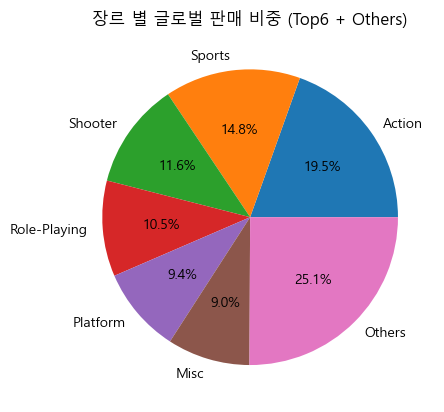

In [8]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# 파이차트
# => 상위 6개 장르, 나머지는 Other
top6_genres = genre_sales.head(6)
others = genre_sales.iloc[6:].sum()

pie_values = top6_genres.tolist() + [others]
pie_labels = top6_genres.index.tolist() + ['Others']

plt.figure()
plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%')
plt.title("장르 별 글로벌 판매 비중 (Top6 + Others)")

문제 7. Publisher 별 평균 판매량
- Publisher 별 평균 Global_Sales를 구하고, 상위 10개만 출력하시오.

In [9]:
pub_mean = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
top10_pub_mean = pub_mean.head(10)

top10_pub_mean

# TODO: 최소 5개 이상 발매한 Publisher만 인정

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.563836
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64

문제 8. 특정 Publisher 집중 분석
- `Nintendo` 또는 `Electronic Arts` 중 하나를 선택하여, 연도별 Global_Sales 추세를 선 그래프로 나타내시오.

Text(0.5, 1.0, 'Nintendo 연도별 Global_Sales 추세')

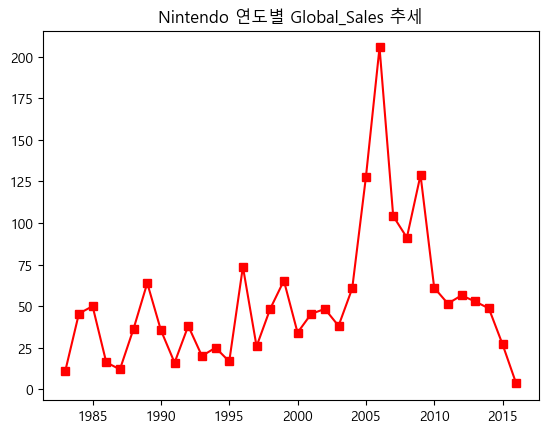

In [10]:
publisher = 'Nintendo'
pub_df = df[df['Publisher'] == publisher]

sales_by_year = pub_df.groupby('Year')['Global_Sales'].sum().sort_index()

plt.figure()
plt.plot(sales_by_year, linestyle='-', marker='s', color='red')
plt.title('Nintendo 연도별 Global_Sales 추세')

문제 9. Publisher 별 가장 많이 발매한 장르
- 각 Publisher가 가장 많이 만든 장르는 무엇인지 구하시오. \
    (Publisher 별로 Genre count의 최대값 찾기)

[hint]
`groupby(['Publisher', 'Genre']).size().reset_index()`

In [29]:
# Publisher, Genre 조합하여 발매 수
df_pg = df.groupby(['Publisher', 'Genre']).size().reset_index(name='count')

# 각 Publisher 별 발매수가 가장 많은 Genre 조회
idx = df_pg.groupby('Publisher')['count'].idxmax()
# => 각 Publisher 별 발매수(count)가 가장 큰 값을 가진 행의 인덱스
df_pg_result = df_pg.loc[idx].sort_values('count', ascending=False).reset_index(drop=True)

df_pg_result.head(10)

,Publisher,Genre,count
0,Electronic Arts,Sports,554
1,Activision,Action,308
2,Konami Digital Entertainment,Sports,279
3,Namco Bandai Games,Action,247
4,THQ,Action,193
5,Ubisoft,Action,193
6,Capcom,Action,154
7,Take-Two Interactive,Sports,151
8,Warner Bros. Interactive Entertainment,Action,150
9,Tecmo Koei,Action,137


문제 10. 지역별 판매량 비교
- NA_Sales, EU_Sales, JP_Sales, Other_Sales 전 세계 합을 비교하여 그래프로 표현하시오.

Text(0.5, 1.0, '지역별 총 판매량 (Pie)')

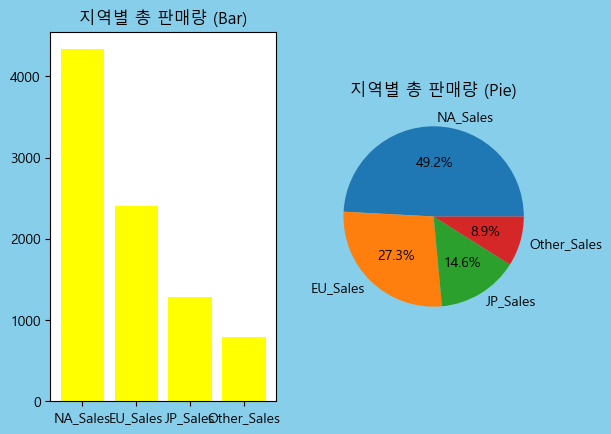

In [ ]:
# 각 컬럼(지역) 별 총합
region_sum = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# pie, bar, 
'''
# simple version
plt.figure()
plt.bar(x=region_sum.index, height=region_sum)
plt.title('지역별 총 판매량')
'''
# 여러 개의 그래프를 표시
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 컨테이너 배경색 설정
fig.set_facecolor('skyblue')

# bar 그래프 표시
ax1.bar(x=region_sum.index, height=region_sum, color='yellow')
ax1.set_title('지역별 총 판매량 (Bar)')

# pie 차트 표시
ax2.pie(region_sum, autopct='%1.1f%%', labels=region_sum.index)
ax2.set_title('지역별 총 판매량 (Pie)')

문제 11. 국가별로 인기 있는 장르
- NA / EU / JP 각각 판매량이 가장 높은 장르를 구하시오.

In [45]:
# NA 국가의 판매량이 높은 장르
na_top = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(1)

# EU 국가의 판매량이 높은 장르
eu_top = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).head(1)

# JP 국가의 판매량이 높은 장르
jp_top = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).head(1)

print(na_top)
print(eu_top)
print(jp_top)

Genre
Action    861.8
Name: NA_Sales, dtype: float64
Genre
Action    516.48
Name: EU_Sales, dtype: float64
Genre
Role-Playing    350.29
Name: JP_Sales, dtype: float64


문제 12. 연도 + 장르 + 플랫폼 종합 분석
- 특정 장르를 선택하여 
    - 연도별 출시 수
    - 플랫폼별 판매량 TOP5 
    를 각각 그래프로 시각화 하시오
- 결과를 확인하여 해당 장르의 트렌드를 3문장으로 정리하시오.

<BarContainer object of 5 artists>

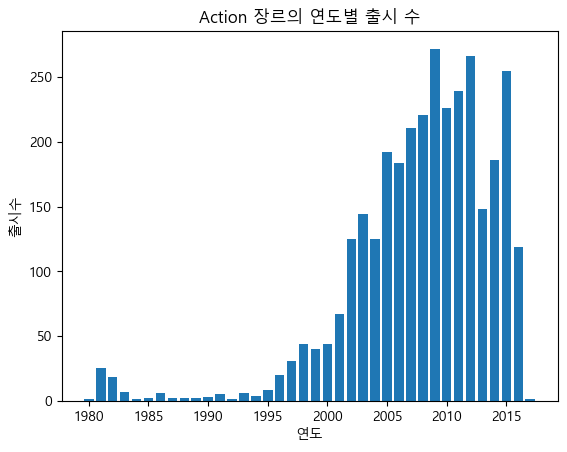

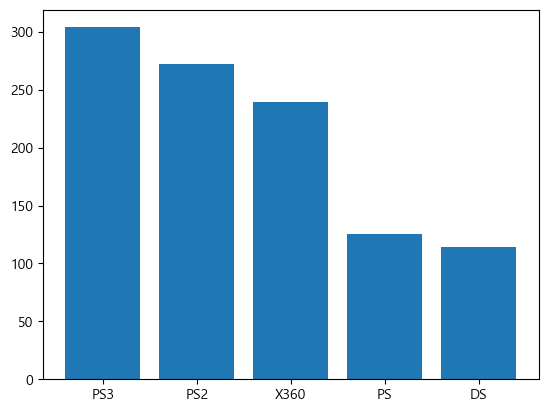

In [ ]:
# 특정 장르 선택 => Action
genre = 'Action'
act_df = df[df['Genre'] == genre]

# * 연도별 출시 수
size_by_year = act_df.groupby('Year').size().sort_index()
# 그래프 표시 : Bar
plt.figure()
plt.bar(size_by_year.index, size_by_year)
plt.title(f'{genre} 장르의 연도별 출시 수')
plt.xlabel('연도')
plt.ylabel('출시수')

# * 플랫폼별 판매량 TOP5
sales_by_platform_top5 = act_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# 그래프 표시 : Bar
plt.figure()
plt.bar(x=sales_by_platform_top5.index, height=sales_by_platform_top5)
plt.title(f'{genre} 장르의 플랫폼별 판매량 TOP5')
plt.xlabel('플랫폼')
plt.ylabel('판매량')